In [1]:
#https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/
import scipy.stats as sp
import sklearn
#Plot the volume to see the trend
from matplotlib import pyplot as plt
import numpy as np
import math 
import pandas as pd
df = pd.read_excel(r'C:\Users\xwang\OneDrive - CCMI\Desktop\Python\New folder\Chicago.xlsx', sheet_name = 'New Method')
print (df)

         Time          IHS       FRED Cal         Diff  Margin  Result
0  2016-01-01  23494.258219  26004.405532  2510.147313     NaN     NaN
1  2016-04-01  25202.348015  28196.705078  2994.357063     NaN     NaN
2  2016-07-01  24528.641938  27599.979830  3071.337891     NaN     NaN
3  2016-10-01  26485.661854  30055.524630  3569.862775     NaN     NaN
4  2017-01-01  24127.939592  27497.537804  3369.598212     NaN     NaN
5  2017-04-01  24878.379627  28794.917561  3916.537934     NaN     NaN
6  2017-07-01  24054.460917  28204.413736  4149.952819     NaN     NaN
7  2017-10-01  23725.469330  27927.200227  4201.730898     NaN     NaN
8  2018-01-01  23437.990430  27726.827079  4288.836650     NaN     NaN
9  2018-04-01  23930.510326  28937.520608  5007.010282     NaN     NaN
10 2018-07-01  23350.854365  28511.543011  5160.688645     NaN     NaN
11 2018-10-01  22181.628873  27362.655330  5181.026457     NaN     NaN
12 2019-01-01  22184.901250  27438.322280  5253.421030     NaN     NaN
13 201

In [2]:
x = df['Time']
print(type(x))
y = df['Diff']

<class 'pandas.core.series.Series'>


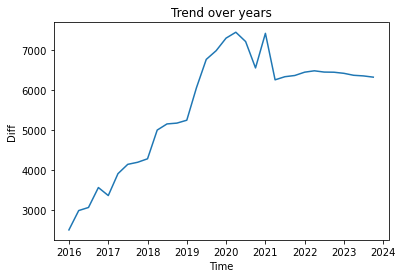

In [3]:
plt.plot(x,y)
plt.xlabel("Time")
plt.ylabel("Diff")
plt.title('Trend over years')
plt.show()

        Time          IHS       FRED Cal         Diff  Margin  Result
0 2016-01-01  23494.258219  26004.405532  2510.147313     NaN     NaN
1 2016-04-01  25202.348015  28196.705078  2994.357063     NaN     NaN
2 2016-07-01  24528.641938  27599.979830  3071.337891     NaN     NaN
3 2016-10-01  26485.661854  30055.524630  3569.862775     NaN     NaN
4 2017-01-01  24127.939592  27497.537804  3369.598212     NaN     NaN


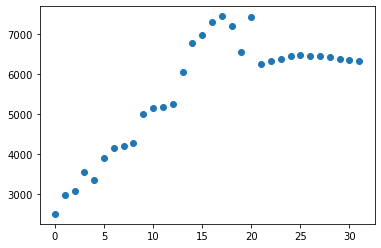

In [4]:
#scatter plot-each data point
print (df.head())
df['Diff'].dropna().plot(marker='o', ls='');

In [5]:
#check type of input 
y=np.array(df['Diff'].dropna().values, dtype=float)
y
x=np.array(pd.to_datetime(df['Diff'].dropna()).index.values, dtype=float)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31.])

In [6]:
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
# fit into linear regression model
print(slope)
print(intercept)
#get coefficients for our model

124.99481870858031
3650.123567743767


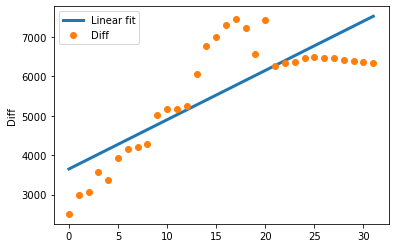

In [7]:
# compare the model with data
f, ax = plt.subplots(1, 1)
yf = (slope*x)+intercept
ax.plot(x, yf,label='Linear fit', lw=3)
df['Diff'].dropna().plot(ax=ax,marker='o', ls='')
plt.ylabel('Diff')
ax.legend();

In [8]:
#check how fit our model is
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  0.8097130403412126 
 p =  1.9945128939240698e-08 
 s =  16.539014254989212


In [9]:
#check accurancy of model
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y, yf)

0.6556352076986103